<a href="https://colab.research.google.com/github/EronDS/Neural-Networks/blob/main/RestrictedBoltzmannMachine/CancerBelignOrMalignCLF/CancerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Our scope is to predict when a cancerogenic cell is Benign or Malign. The main difference between both is that the Malign cell can do metastasis (highly capable of multiplying and spread to other tissues).


In addition, these two classifications can be obtained with the format of the tumor/cells (most of the data available here for the model), energy transformation (with the malignant cells being able to maintain a higher level of anaerobic respiration reflecting the greater speed of spreading and growth, an effect known as the Warburg Effect) and others aspects.

Recommendation: Aktipis, Athena. "The Cheating Cell."  (Good book and highly readable)



In [ ]:
!pip install sklearn-deap

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import plotly.express as px
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.metrics import mean_squared_error,classification_report
from sklearn.neural_network import rbm, BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
import pickle
warnings.filterwarnings('ignore')



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets-Github/CancerPrediction/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.drop(df.columns[-1] , axis = 1, inplace = True)

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


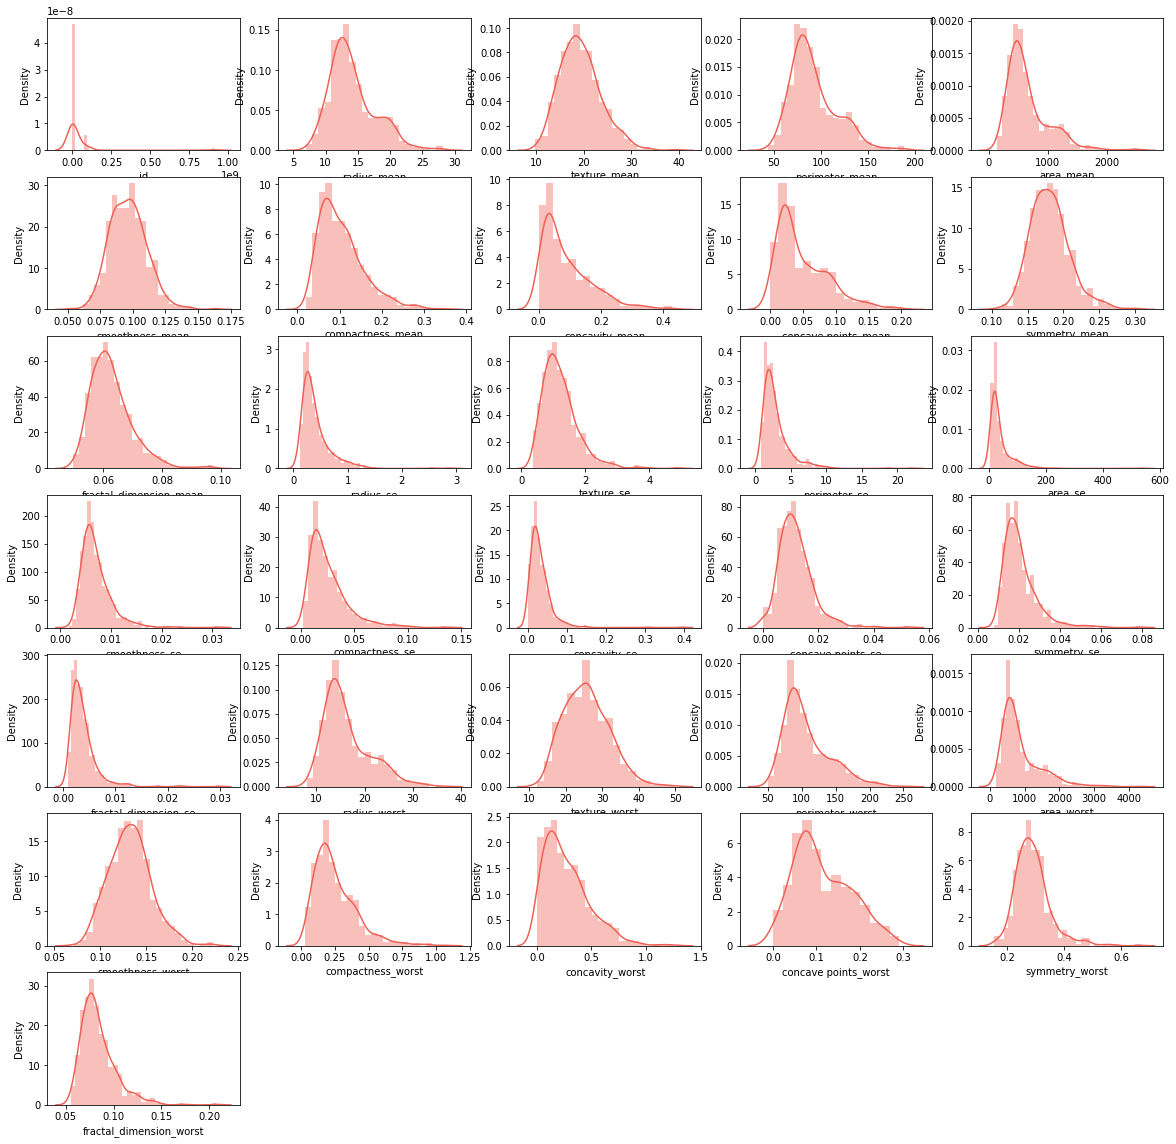

In [ ]:
k = ['#EE6055', '#60D394']
     

num = df.drop('diagnosis' , axis = 1, inplace = False)
plt.figure(figsize= (20,20))
for i, column in enumerate(num.columns, 1):
    plt.subplot(7,5,i)
    print(' ')
    sns.distplot(df[column] , color = k[0] )

In [ ]:
df.drop('id' , axis = 1, inplace = True)

In [ ]:
df.diagnosis.value_counts() # B = Benign | M = Malign

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
df.diagnosis  = LabelEncoder().fit_transform(df.diagnosis)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Text(0.5, 1.0, 'Cancer Diagnosis')

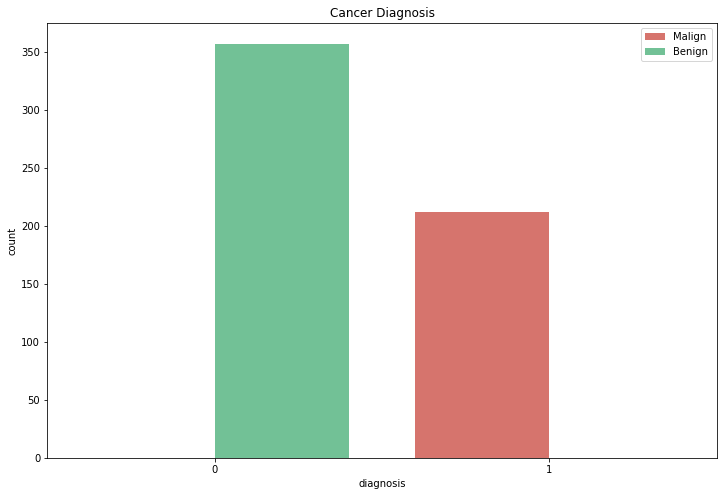

In [ ]:

diag = []

for i in df.diagnosis:
  if i == 1:
    diag.append('Malign')
  else:
    diag.append('Benign')





plt.figure(figsize = (12,8))
sns.countplot(df.diagnosis , palette = k  , hue = diag , saturation = .69 ,).set_title('Cancer Diagnosis')

<Figure size 1440x1296 with 0 Axes>

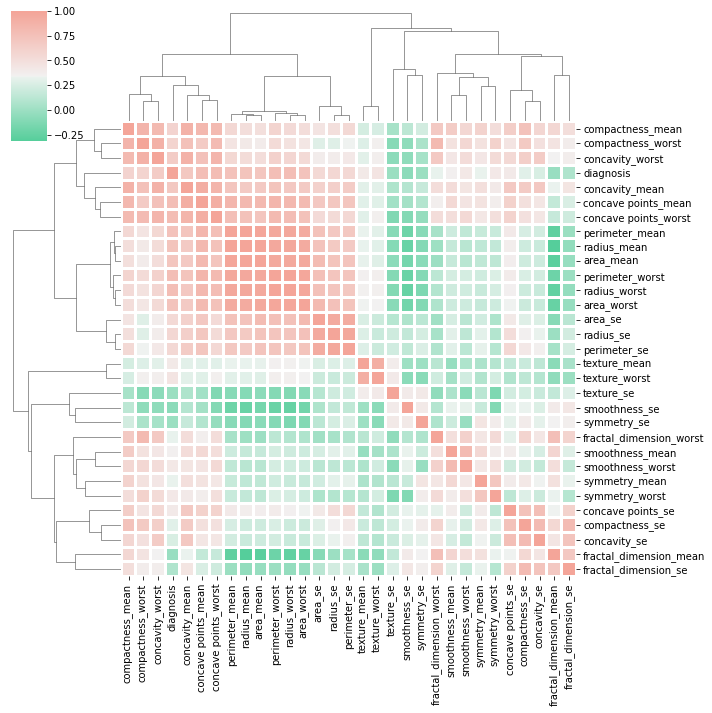

In [ ]:
corrPearson = df.corr()

plt.figure(figsize = (20,18))

cmap = sns.diverging_palette(150 , 20 , s = 80 , l = 75 , n= 6 , as_cmap = True)
sns.clustermap(corrPearson, annot = False, linewidth  =2 , cmap = cmap , )

In [ ]:

hist1 = px.histogram( x = df.perimeter_mean , color = diag ,
             template = 'plotly_white' , color_discrete_sequence= k, opacity = .8,
             marginal = 'box' , title = 'Mean Perimeter Distribution of Malign & Benign Cancerigenous Cells')

hist1.update_layout(xaxis_title = ' ' , yaxis_title = ' ')

In [ ]:

hist2 = px.histogram( x = df.concavity_mean , color = diag ,
             template = 'plotly_white' , color_discrete_sequence= k, opacity = .8,
             marginal = 'box' , title = 'Cell Radius Mean Distribution of Malign & Benign Cancerigenous Cells')

hist2.update_layout(xaxis_title = ' ', yaxis_title = ' '  )

Preparing Variables for Models

In [ ]:
y = df.diagnosis

x = df.drop('diagnosis' , axis = 1, inplace = False)

#Z-scored Variables

Xzsc = StandardScaler().fit_transform(x)
Xzsc

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(Xzsc, y , test_size = .2)
(x_train.shape , y_train.shape)

((455, 30), (455,))

Testing Models with default parameters

Simple Logistic Regression


In [ ]:
LogReg = LogisticRegression()



LogReg.fit(x_train, y_train)

LogRegPredictions = LogReg.predict(x_test)
y_real = y_test

pd.crosstab(y_real , LogRegPredictions ,)

col_0,0,1
diagnosis,,
0,79,1
1,2,32


In [ ]:
print(classification_report(y_real , LogRegPredictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        80
           1       0.97      0.94      0.96        34

    accuracy                           0.97       114
   macro avg       0.97      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



Restricted Boltzmann Machine

In [ ]:
RBM = Pipeline(steps = [('rbm' , BernoulliRBM(n_components= 312)) , ('clf' , LogisticRegression())])
RBM.fit(x_train,y_train)
RBMp = RBM.predict(x_test)
y_real = y_test

pd.crosstab(RBMp , y_real)

diagnosis,0,1
row_0,,
0,72,3
1,8,31


In [ ]:
RBM = Pipeline(steps = [('rbm' , BernoulliRBM()) , ('classifier' , LogisticRegression())])


parameters = [{'rbm__n_components': [256,312,450,620],'rbm__learning_rate': [.1,.001,.01], 
               'rbm__n_iter': [20,50,100], 
               'rbm__batch_size':[32,64,128,256] , 
               'classifier__penalty' : ['l1', 'l2'],
               'classifier__C' : np.logspace(-4, 4, 20),
               'classifier__solver' : ['liblinear']}]


evo = EvolutionaryAlgorithmSearchCV(RBM, parameters,scoring = 'accuracy',
                              cv = 10, population_size = 50,
                              gene_mutation_prob = .3 , )


evo.fit(x_train,y_train)


Best parameters (See that some parameters were not listed , they emerged through mutation or mate between 2 individuals)

In [ ]:
evo.best_estimator_

Pipeline(memory=None,
         steps=[('rbm',
                 BernoulliRBM(batch_size=128, learning_rate=0.001,
                              n_components=312, n_iter=20, random_state=None,
                              verbose=0)),
                ('classifier',
                 LogisticRegression(C=78.47599703514607, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='liblinear',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

99% of Accuracy in the entire dataset

In [ ]:
print(classification_report(evo.predict(Xzsc) , y))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       361
           1       0.97      0.99      0.98       208

    accuracy                           0.99       569
   macro avg       0.98      0.99      0.98       569
weighted avg       0.99      0.99      0.99       569



98% of Accuracy in the testset

In [ ]:
print(classification_report(evo.predict(x_test) , y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        80
           1       0.97      0.97      0.97        34

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Diving in The Metrics

In [ ]:
yhat = evo.predict(Xzsc)
y = y

pd.crosstab(y, yhat , rownames = 'R' , colnames = 'P') 
# We missed 6 classification in Benign Cells (Erroneous Classified as Malign) and 2 Malign Cells erroneous classified as Benign

P,0,1
R,,
0,355,2
1,6,206


**Discussion**

Boltzmann Machine is a stochastic model that takes every state of possibility and makes a probability distribution, where the low energy states (In this case, the energy are the weights in the Neural Network of Boltzmann machine) is more probable of occurring. The Boltzmann Machines are based on the Boltzmann distribution present in Thermodynamics and Mathematics, describing the occurrence of states with low energy and the Probabilistic nature of Entropy.


In our case, Restricted Boltzmann Machines were used. Boltzmann Machines depends on calculating all the possible states, this is highly computationally expensive. So a possibility relies on using Restricted Boltzmann Machines, where we take a shortcut, where there's no need to calculate all possible states.


Besides this method, we used Logistic Regression as the Output of our Restricted Boltzmann Machine, consisting of a Bernoulli Restricted Boltzmann Machine, where the outputs are a binary probabilistic classification.




**References:**

Hinton, Geoffrey E. "Boltzmann machine." Scholarpedia 2, no. 5 (2007): 1668.

Salakhutdinov, Ruslan, Andriy Mnih, and Geoffrey Hinton. "Restricted Boltzmann machines for collaborative filtering." In Proceedings of the 24th international conference on Machine learning, pp. 791-798. 2007.

Hinton, Geoffrey E., Simon Osindero, and Yee-Whye Teh. "A fast learning algorithm for deep belief nets." Neural computation 18, no. 7 (2006): 1527-1554.

Abdi, Hervé, and Lynne J. Williams. "Principal component analysis." Wiley interdisciplinary reviews: computational statistics 2, no. 4 (2010): 433-459.






Testing if we can obtain more accuracy with PCA (a technique of dimensionality reduction) 

Text(0, 0.5, 'Cumulative explained variance')

<Figure size 1440x720 with 0 Axes>

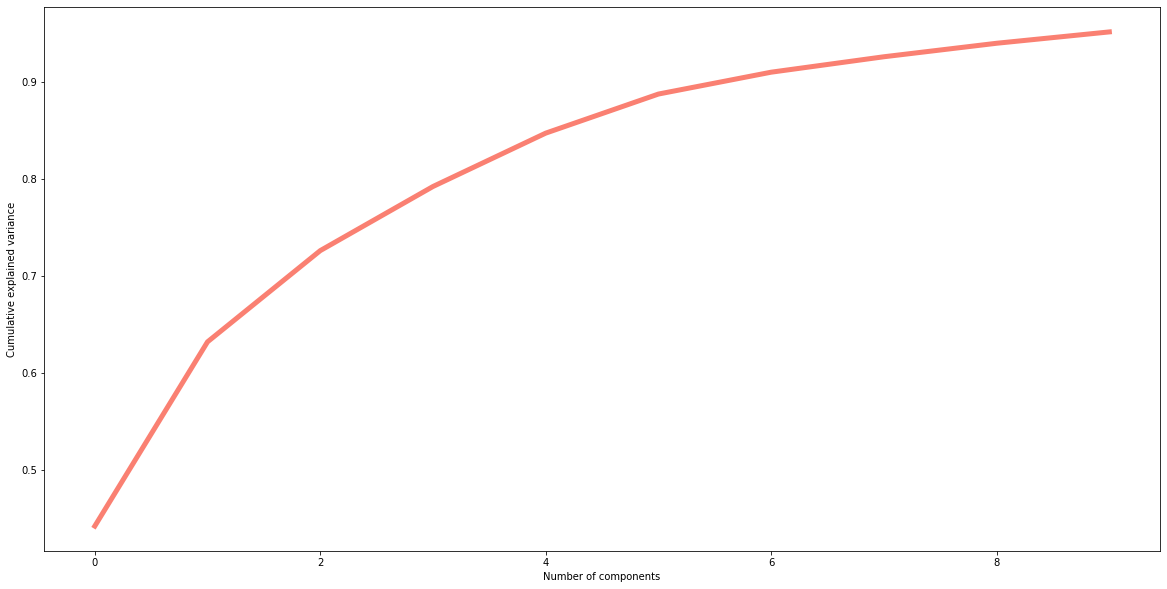

In [ ]:
Pca = PCA(.95)
Pca.fit(Xzsc)


plt.figure(figsize = (20,10))



plt.figure(figsize = (20,10))
plt.plot(np.cumsum(Pca.explained_variance_ratio_) , linewidth = 5 , color = 'salmon')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')



In [ ]:
RBMwPCA = Pipeline(steps = [('pca' , PCA()),('rbm' , BernoulliRBM()) , ('classifier' , LogisticRegression())])


parameterspca = [{'pca__n_components': [.7,.75,.8,.85,.9],
               'rbm__n_components': [256,312,450,620],'rbm__learning_rate': [.1,.001,.01], 
               'rbm__n_iter': [20,50,100], 
               'rbm__batch_size':[32,64,128,256] , 
               'classifier__penalty' : ['l1', 'l2'],
               'classifier__C' : np.logspace(-4, 4, 20),
               'classifier__solver' : ['liblinear']}]


evopca = EvolutionaryAlgorithmSearchCV(RBMwPCA, parameterspca,scoring = 'accuracy',
                              cv = 10, population_size = 50,
                              gene_mutation_prob = .3 , )


evopca.fit(x_train,y_train)


In [ ]:
print(classification_report(evopca.predict(Xzsc) , y)) # we gonna keep the old model, since the PCA didn't improve the metrics

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       360
           1       0.97      0.98      0.97       209

    accuracy                           0.98       569
   macro avg       0.98      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569



Saving our old Model (Restricted Boltzmann Machine w Logistic Regression)

In [ ]:
pickle.dump(evo.best_estimator_, open('RBMBernoulli.sav' , 'wb'))

In [ ]:
pickle.load(open('RBMBernoulli.sav','rb'))

Pipeline(memory=None,
         steps=[('rbm',
                 BernoulliRBM(batch_size=128, learning_rate=0.001,
                              n_components=312, n_iter=20, random_state=None,
                              verbose=0)),
                ('classifier',
                 LogisticRegression(C=78.47599703514607, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='liblinear',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)